In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df_jlcp = pd.read_excel("/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/JLCP/jlcp2021.xlsx")
df_org = pd.read_csv("/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/clean/org_data.csv")
df_jlcp=df_jlcp.rename(columns={'Performance year': 'year'}).rename(columns={'Stock code': 'code'})
df_merged = pd.merge(df_org, df_jlcp, on=['code', 'year'], how='inner')

In [12]:
df_merged

,Unnamed: 0,code,year,shortest_path_length,num_depart,Company name,JIPcode,ln(gross output),ln(intermediate input),"ln(real stock of capital, quality adjusted)","ln(labor input, hours worked and labor quality adjusted)",cost share of capital input,cost share of labor input,cost share of intermediate input,"Multilateral TFP, base year=2011, industry=JIPcode","ln(TFP), outlier included"
0,0,7273,2010,2.403158,76,（株）イクヨ,50_自動車部品・同付属品,16.113668,15.846857,15.699437,12.972420,0.103877,0.091135,0.804988,-0.037495,-0.037495
1,1,7267,2010,1.401754,76,本田技研工業（株）,49_自動車（自動車車体含む）,21.780460,21.702532,20.541185,17.741119,0.041884,0.063447,0.894669,-0.049591,-0.049591
2,2,7298,2010,3.095088,76,八千代工業（株）,50_自動車部品・同付属品,19.139595,19.044926,17.561712,15.351371,0.030349,0.075226,0.894425,-0.040134,-0.040134
3,3,7105,2010,1.633684,76,三菱ロジスネクスト（株）,35_はん用機械,17.396486,17.279867,15.980019,14.026162,0.040683,0.089377,0.869940,-0.094760,-0.094760
4,4,7313,2010,1.748070,76,テイ・エス テック（株）,50_自動車部品・同付属品,18.515720,18.402452,16.851654,15.032758,0.027814,0.095161,0.877025,-0.047528,-0.047528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,96,7294,2010,2.064912,76,（株）ヨロズ,50_自動車部品・同付属品,17.621262,17.460281,16.380054,13.380939,0.046125,0.045384,0.908491,0.031206,0.031206
94,97,7280,2010,1.501754,76,（株）ミツバ,50_自動車部品・同付属品,18.648327,18.426420,17.366669,15.831733,0.042061,0.146281,0.811658,-0.054551,-0.054551
95,98,7273,2002,1.418947,76,（株）イクヨ,50_自動車部品・同付属品,16.477575,16.326847,16.155590,13.260465,0.108322,0.091819,0.799859,-0.134901,-0.134901
96,99,7242,2010,1.868421,76,ＫＹＢ（株）,50_自動車部品・同付属品,19.167606,18.974113,18.083031,15.841152,0.051748,0.104655,0.843597,-0.021939,-0.021939


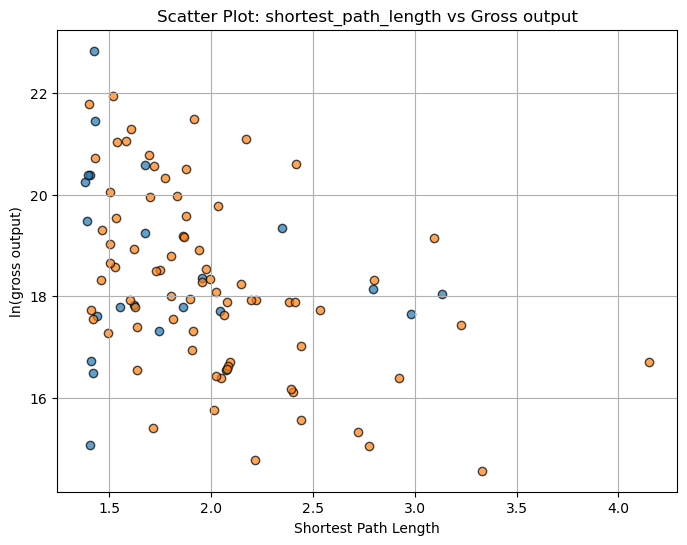

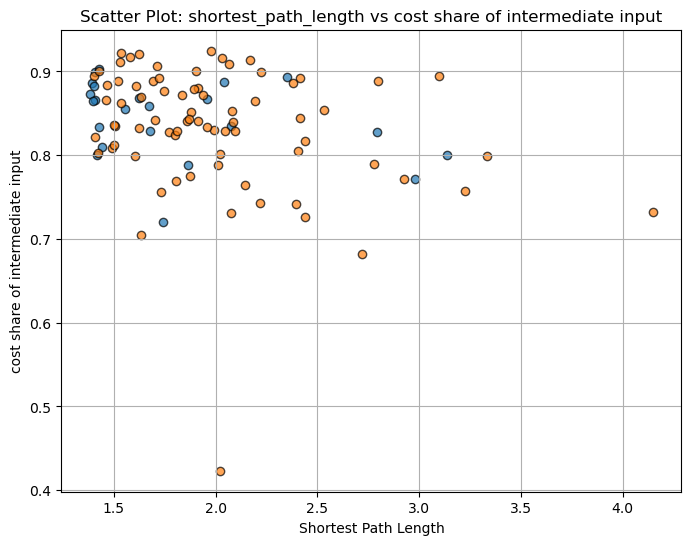

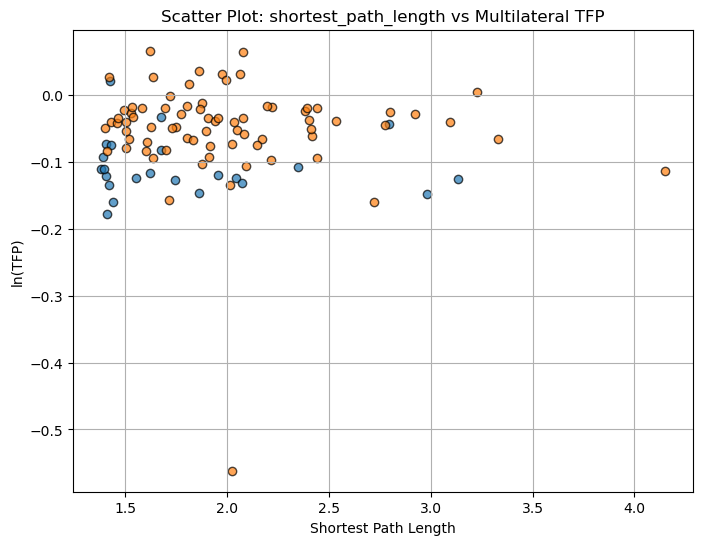

In [13]:
import matplotlib.pyplot as plt

# function for scatter plot
def plot_scatter(x, y, x_label, y_label, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[df_merged["year"]== 2002], y[df_merged["year"]== 2002], alpha=0.7, edgecolors='k')
    plt.scatter(x[df_merged["year"]== 2010], y[df_merged["year"]== 2010], alpha=0.7, edgecolors='k')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# Gross output
plot_scatter(
    df_merged['shortest_path_length'],
    df_merged["ln(gross output)"],
    "Shortest Path Length",
    "ln(gross output)",
    "Scatter Plot: shortest_path_length vs Gross output"
)

# Cost share of intermediate-inputs
plot_scatter(
    df_merged['shortest_path_length'],
    df_merged['cost share of intermediate input'],
    "Shortest Path Length",
    "cost share of intermediate input",
    "Scatter Plot: shortest_path_length vs cost share of intermediate input"
)

# TFP
plot_scatter(
    df_merged['shortest_path_length'],
    df_merged['Multilateral TFP, base year=2011, industry=JIPcode'],
    "Shortest Path Length",
    "ln(TFP)",
    "Scatter Plot: shortest_path_length vs Multilateral TFP"
)


